In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


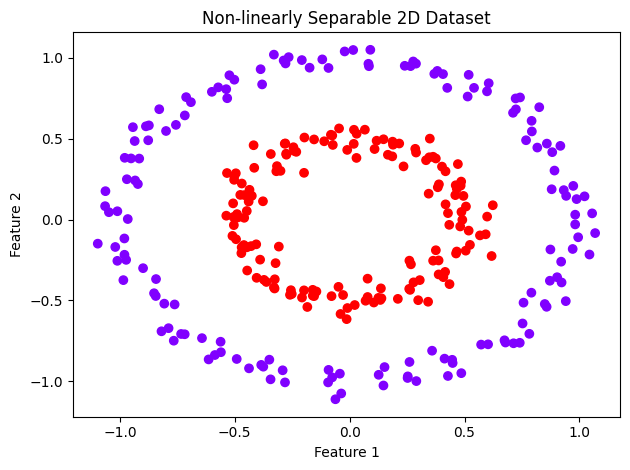

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:
Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
perceptron = Sequential()
perceptron.add(Dense(units = 1, input_dim = 2, activation = "sigmoid"))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
from tensorflow.keras.optimizers import legacy
sgd = legacy.SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.



In [ ]:
perceptron.fit(X_train, y_train, batch_size = 16, epochs = 300)

Epoch 1/300
15/15 [==============================] - 1s 10ms/step - loss: 0.6999
Epoch 2/300
15/15 [==============================] - 0s 9ms/step - loss: 0.6999
Epoch 3/300
15/15 [==============================] - 0s 9ms/step - loss: 0.6995
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6993
Epoch 5/300
15/15 [==============================] - 0s 13ms/step - loss: 0.6992
Epoch 6/300
15/15 [==============================] - 0s 9ms/step - loss: 0.6990
Epoch 7/300
15/15 [==============================] - 0s 9ms/step - loss: 0.6987
Epoch 8/300
15/15 [==============================] - 0s 10ms/step - loss: 0.6986
Epoch 9/300
15/15 [==============================] - 0s 6ms/step - loss: 0.6984
Epoch 10/300
15/15 [==============================] - 0s 6ms/step - loss: 0.6983
Epoch 11/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6981
Epoch 12/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6979
Epoch 13/300
15/15 [==============

Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = perceptron.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score
def accuracy(y, y_preds):
    y_pred_classes = (y_preds > 0.5).astype("int32")  # Convert probabilities to class labels
    accuracy = accuracy_score(y_test, y_pred_classes)
    return accuracy

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.35


57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

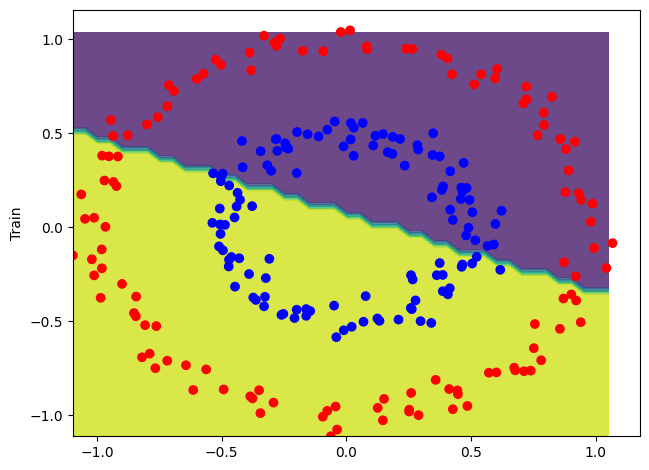

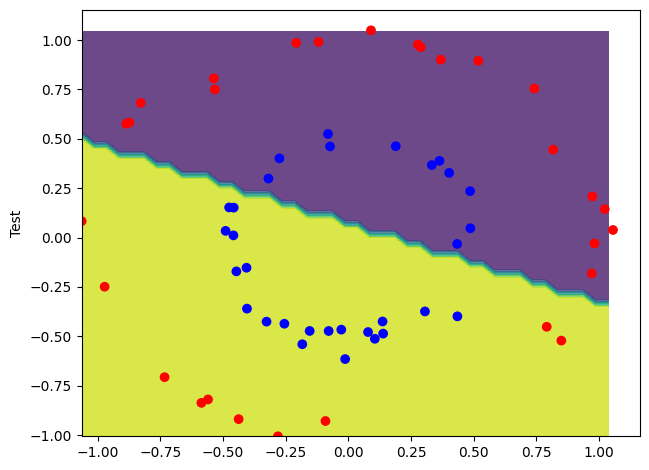

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()
    model.add(Dense(units = 2, input_dim = 2, activation = "relu"))
    model.add(Dense(units = 1, activation = "sigmoid"))
    sgd = legacy.SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss="binary_crossentropy", optimizer=sgd)
    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.



In [ ]:
model.fit(X_train, y_train, batch_size = 16, epochs = 300)

Epoch 1/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5876
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5872
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5867
Epoch 4/300
15/15 [==============================] - 0s 4ms/step - loss: 0.5863
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 0.5859
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5854
Epoch 7/300
15/15 [==============================] - 0s 4ms/step - loss: 0.5850
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5845
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5841
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5837
Epoch 11/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5832
Epoch 12/300
15/15 [==============================] - 0s 3ms/step - loss: 0.5828
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by using your own function.

In [ ]:
y_preds2 = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
print(f"Test Accuracy: {accuracy(y_test, y_preds2)}")       # Using the defined `accuracy` function above.

Test Accuracy: 0.7333333333333333


57/57 [==============================] - 0s 3ms/step


Text(22.347222222222214, 0.5, 'Test')

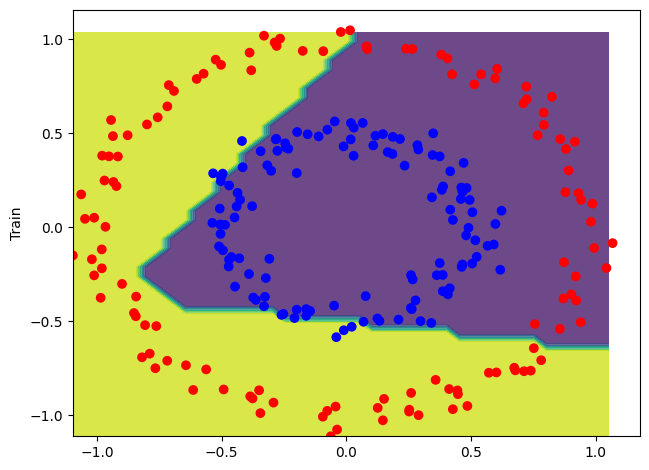

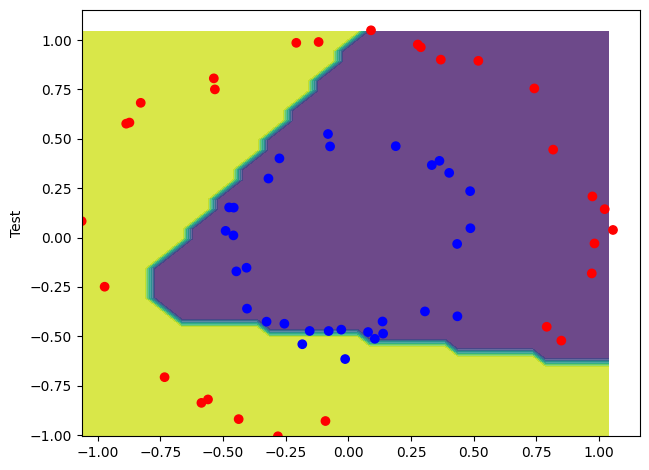

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)
y_test_vectorized = to_categorical(y_test)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()
    model.add(Dense(units = 10, input_dim = 2, activation = "relu"))
    model.add(Dense(units = 5, activation = "relu"))
    model.add(Dense(units = 2, activation = "softmax"))
    sgd = legacy.SGD(learning_rate = 0.001, decay = 1e-7, momentum = 0.9)
    model.compile(loss = "categorical_crossentropy", optimizer = sgd)
    return model

In [ ]:
model2 = build_classification_model()

Q2. Fit your model by training set

In [ ]:
model2.fit(X_train, y_train_vectorized, batch_size = 16, epochs = 300)

Epoch 1/300
15/15 [==============================] - 1s 9ms/step - loss: 0.7175
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7162
Epoch 3/300
15/15 [==============================] - 0s 10ms/step - loss: 0.7148
Epoch 4/300
15/15 [==============================] - 0s 10ms/step - loss: 0.7137
Epoch 5/300
15/15 [==============================] - 0s 13ms/step - loss: 0.7122
Epoch 6/300
15/15 [==============================] - 0s 7ms/step - loss: 0.7112
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7102
Epoch 8/300
15/15 [==============================] - 0s 12ms/step - loss: 0.7093
Epoch 9/300
15/15 [==============================] - 0s 8ms/step - loss: 0.7085
Epoch 10/300
15/15 [==============================] - 0s 6ms/step - loss: 0.7077
Epoch 11/300
15/15 [==============================] - 0s 9ms/step - loss: 0.7070
Epoch 12/300
15/15 [==============================] - 0s 8ms/step - loss: 0.7062
Epoch 13/300
15/15 [=============

In [ ]:
ypred3 = model2.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_pred_classes2 = (ypred3 > 0.5).astype("int32")
accuracy2 = accuracy_score(y_test_vectorized, y_pred_classes2)
print (f"Test Accuracy:", accuracy2)

Test Accuracy: 1.0


Q3. Compute accuracy by using your own function

57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

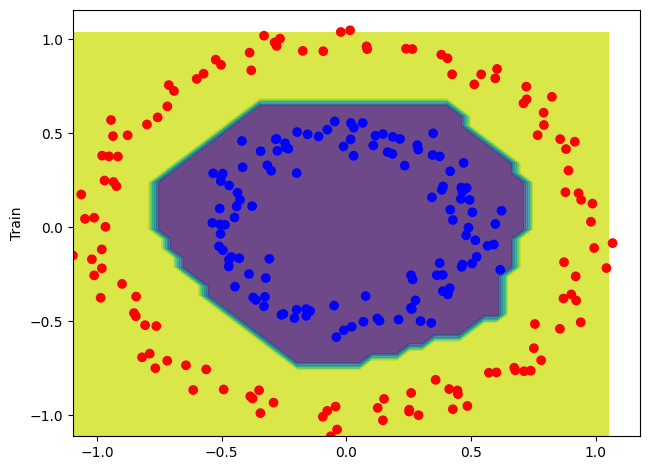

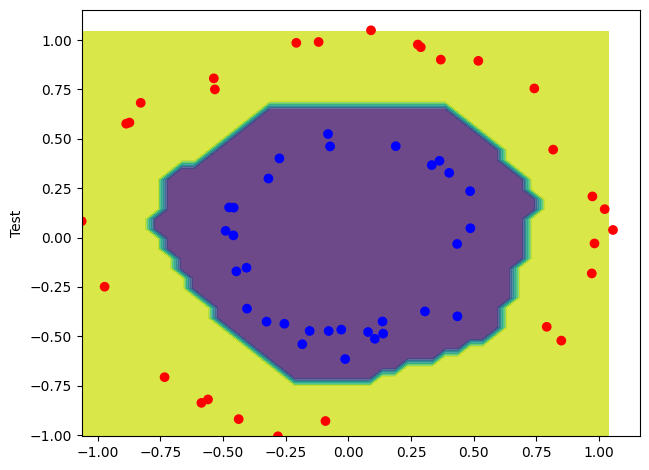

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model2, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model2, X_test, y_test)
ax.set_ylabel("Test")


# Exercise 4:
### Short answer-questions
Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans- If we choose too high of a learning rate for the full batch gradient descent, it is possible to run into a case of divergence where our sample takes too large of a "step" towards the direction of immediate benefit (lowest slope) but ends up going too far past a valley to the point of no return. This could be detrimental in finding a local minimum.

In the second case, a problem could arise from choosing too high of a learning rate for SGD but not for GD is in the case where the sample does gradually converge towards a good local minimum, but the learning rate/random sampling of SGD ends up "slingshotting" our sample around the local minimum to the point that it takes a ridiculously long amount of time to converge, or even worse never converges towards the local minimum. The full batch GD will guarantee convergence because it considers the entire dataset, albeit usually slowly. In this case, SGD could overshoot because of a large learning rate.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- Cropping/resizing data is a form of data augmentation that could help with classifying dogs and cats but not in classifying digits. This is because with dogs and cats, cropped/resized images are still representative of a dog or cat since there are idiosyncrasies that still separate the two. In the case of digits, cropping/resizing images could lead to misclassification. For example, a cropped "7" digit could end up looking like a "1" digit.

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans - The run time for Network A is preferred over Network B. Because of the additional hidden layer, we need to consider 1000 extra neural connections from the input layer to the hidden layer, and another 1000 layers from the hidden layer to the output layer in the case of B. This would result in extra computation time. Network B is preferred over Network A because of accuracy. The hidden layer will likely capture hidden features within the input layer and relay the information for more accurate classification in the output layer. Just like exercise 3 above, adding hidden layers improved our accuracy of classification dramatically.